In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

import sys
sys.path.insert(0, os.path.abspath('../Libraries'))
from countries import get_alpha_3_list

# Total Employment

In [2]:
path = "../Datasets/oecd_employment.csv"
df = pd.read_csv(path)
df.head()

,LOCATION,Country,TRANSACT,Transaction,MEASURE,Measure,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,POPNC,"Total population, national concept",PER,Persons,1959,1959,PER,Persons,3,Thousands,NaN,NaN,10160.968,NaN,NaN
1,AUS,Australia,POPNC,"Total population, national concept",PER,Persons,1960,1960,PER,Persons,3,Thousands,NaN,NaN,10391.920,NaN,NaN
2,AUS,Australia,POPNC,"Total population, national concept",PER,Persons,1961,1961,PER,Persons,3,Thousands,NaN,NaN,10642.654,NaN,NaN
3,AUS,Australia,POPNC,"Total population, national concept",PER,Persons,1962,1962,PER,Persons,3,Thousands,NaN,NaN,10846.059,NaN,NaN
4,AUS,Australia,POPNC,"Total population, national concept",PER,Persons,1963,1963,PER,Persons,3,Thousands,NaN,NaN,11055.482,NaN,NaN


In [3]:
df_2000 = df[(df['TIME'] >= 2000) & (df['TIME'] <= 2021) & (df['MEASURE'] == 'PER')]

In [4]:
def format_data(df, transact_cd):
    # Filter by TRANSACT code and pivot table
    df_new = df[df['TRANSACT'] == transact_cd]
    df_new = pd.pivot_table(df_new, index=['LOCATION', 'PowerCode Code'], columns='TIME', values='Value')
    df_new.dropna(inplace=True)
    df_new = df_new.reset_index().rename_axis(None, axis=1)
    df_new.rename(columns={'PowerCode Code': 'POWER'}, inplace=True)

    # Multiple value for years by the power
    for year in range(len(df_new.columns[2:])):
        df_new[df_new.columns[year+2]] = df_new[df_new.columns[year+2]] * 10**df_new['POWER']
    df_new.drop(columns=['POWER'], inplace=True)

    # Remove countries that are not in the OECD
    df_new = df_new[df_new['LOCATION'].isin(get_alpha_3_list())]

    df_new.reset_index(drop=True, inplace=True) # resets the index due to drops
    return df_new

In [5]:
df_etonc = format_data(df_2000, 'ETONC')
df_etonc.head()

,LOCATION,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AUT,3760776.0,3784543.0,3782099.0,3805925.0,3823829.0,3864554.0,3931567.0,4000652.0,4073689.0,...,4158076.0,4156128.0,4178709.0,4188694.0,4244035.0,4308934.0,4375573.0,4414016.0,4344455.0,4426556.0
1,BEL,4173100.0,4231300.0,4242600.0,4240300.0,4284000.0,4345900.0,4396400.0,4470200.0,4549100.0,...,4653000.0,4638900.0,4657600.0,4698000.0,4756200.0,4830200.0,4900900.0,4978800.0,4980700.0,5071000.0
2,BGR,3239195.0,3214740.0,3222119.0,3317390.0,3403395.0,3495268.0,3612042.0,3726742.0,3814647.0,...,3436393.0,3421577.0,3434165.0,3446214.0,3463347.0,3525352.0,3521640.0,3533578.0,3451744.0,3458409.0
3,CYP,317561.0,324368.0,331096.0,342901.0,356409.0,369256.0,376049.0,392574.0,406308.0,...,394906.0,372769.0,364936.0,370514.0,387221.0,407915.0,429337.0,445349.0,442761.0,448238.0
4,CZE,4829069.0,4819934.0,4853958.0,4822248.0,4789636.0,4856559.0,4917346.0,5005227.0,5073974.0,...,5011816.0,5036563.0,5094540.0,5167112.0,5248683.0,5326658.0,5385105.0,5374584.0,5285168.0,5310031.0


In [6]:
# However countries have varying population sizes, so we need to normalize the data
df_popnc = format_data(df_2000, 'POPNC')
df_popnc.head()

,LOCATION,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AUT,8011566.0,8042293.0,8082121.0,8118245.0,8169441.0,8225278.0,8267948.0,8295189.0,8321541.0,...,8426311.0,8477230.0,8543932.0,8629519.0,8739806.0,8795073.0,8837707.0,8877637.0,8916845.0,8951520.0
1,BEL,10251000.0,10287000.0,10333000.0,10376000.0,10421000.0,10479000.0,10548000.0,10626000.0,10710000.0,...,11107000.0,11159000.0,11209000.0,11274000.0,11331000.0,11375000.0,11427000.0,11489000.0,11544000.0,11592000.0
2,BGR,8170172.0,7913301.0,7868900.0,7823557.0,7781161.0,7739900.0,7699020.0,7659764.0,7623395.0,...,7305888.0,7265115.0,7223937.0,7177991.0,7127821.5,7075946.5,7025036.5,6975760.5,6934015.0,6889362.0
3,CYP,694000.0,701500.0,709610.0,718307.0,727980.0,738540.0,750965.0,767125.0,786632.0,...,863945.0,861939.0,852504.0,847664.0,851561.0,859519.0,870068.0,881952.0,892003.0,900350.0
4,CZE,10272503.0,10224192.0,10200774.0,10201651.0,10206923.0,10234092.0,10266646.0,10322689.0,10429692.0,...,10509286.0,10510719.0,10524783.0,10542942.0,10565284.0,10589526.0,10626430.0,10669324.0,10700155.0,10697314.0


In [7]:
# Get the ratio of employment to population
df_etonc_ratio = df_etonc.copy()
for row in range(df_etonc_ratio.shape[0]):
    for col in range(df_etonc_ratio.shape[1]-1):
        df_etonc_ratio.iloc[row, col+1] = df_etonc_ratio.iloc[row, col+1] / df_popnc.iloc[row, col+1]

df_etonc_ratio.head()

,LOCATION,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AUT,0.469418,0.470580,0.467959,0.468811,0.468065,0.469839,0.475519,0.482286,0.489535,...,0.493463,0.490270,0.489085,0.485391,0.485598,0.489926,0.495103,0.497206,0.487219,0.494503
1,BEL,0.407092,0.411325,0.410587,0.408664,0.411093,0.414725,0.416799,0.420685,0.424753,...,0.418925,0.415709,0.415523,0.416711,0.419751,0.424633,0.428888,0.433354,0.431454,0.437457
2,BGR,0.396466,0.406245,0.409475,0.424026,0.437389,0.451591,0.469156,0.486535,0.500387,...,0.470359,0.470960,0.475387,0.480108,0.485891,0.498216,0.501298,0.506551,0.497799,0.501993
3,CYP,0.457581,0.462392,0.466589,0.477374,0.489586,0.499981,0.500754,0.511747,0.516516,...,0.457096,0.432477,0.428075,0.437100,0.454719,0.474585,0.493452,0.504958,0.496367,0.497849
4,CZE,0.470097,0.471424,0.475842,0.472693,0.469254,0.474547,0.478963,0.484876,0.486493,...,0.476894,0.479183,0.484052,0.490102,0.496786,0.503012,0.506765,0.503742,0.493934,0.496389


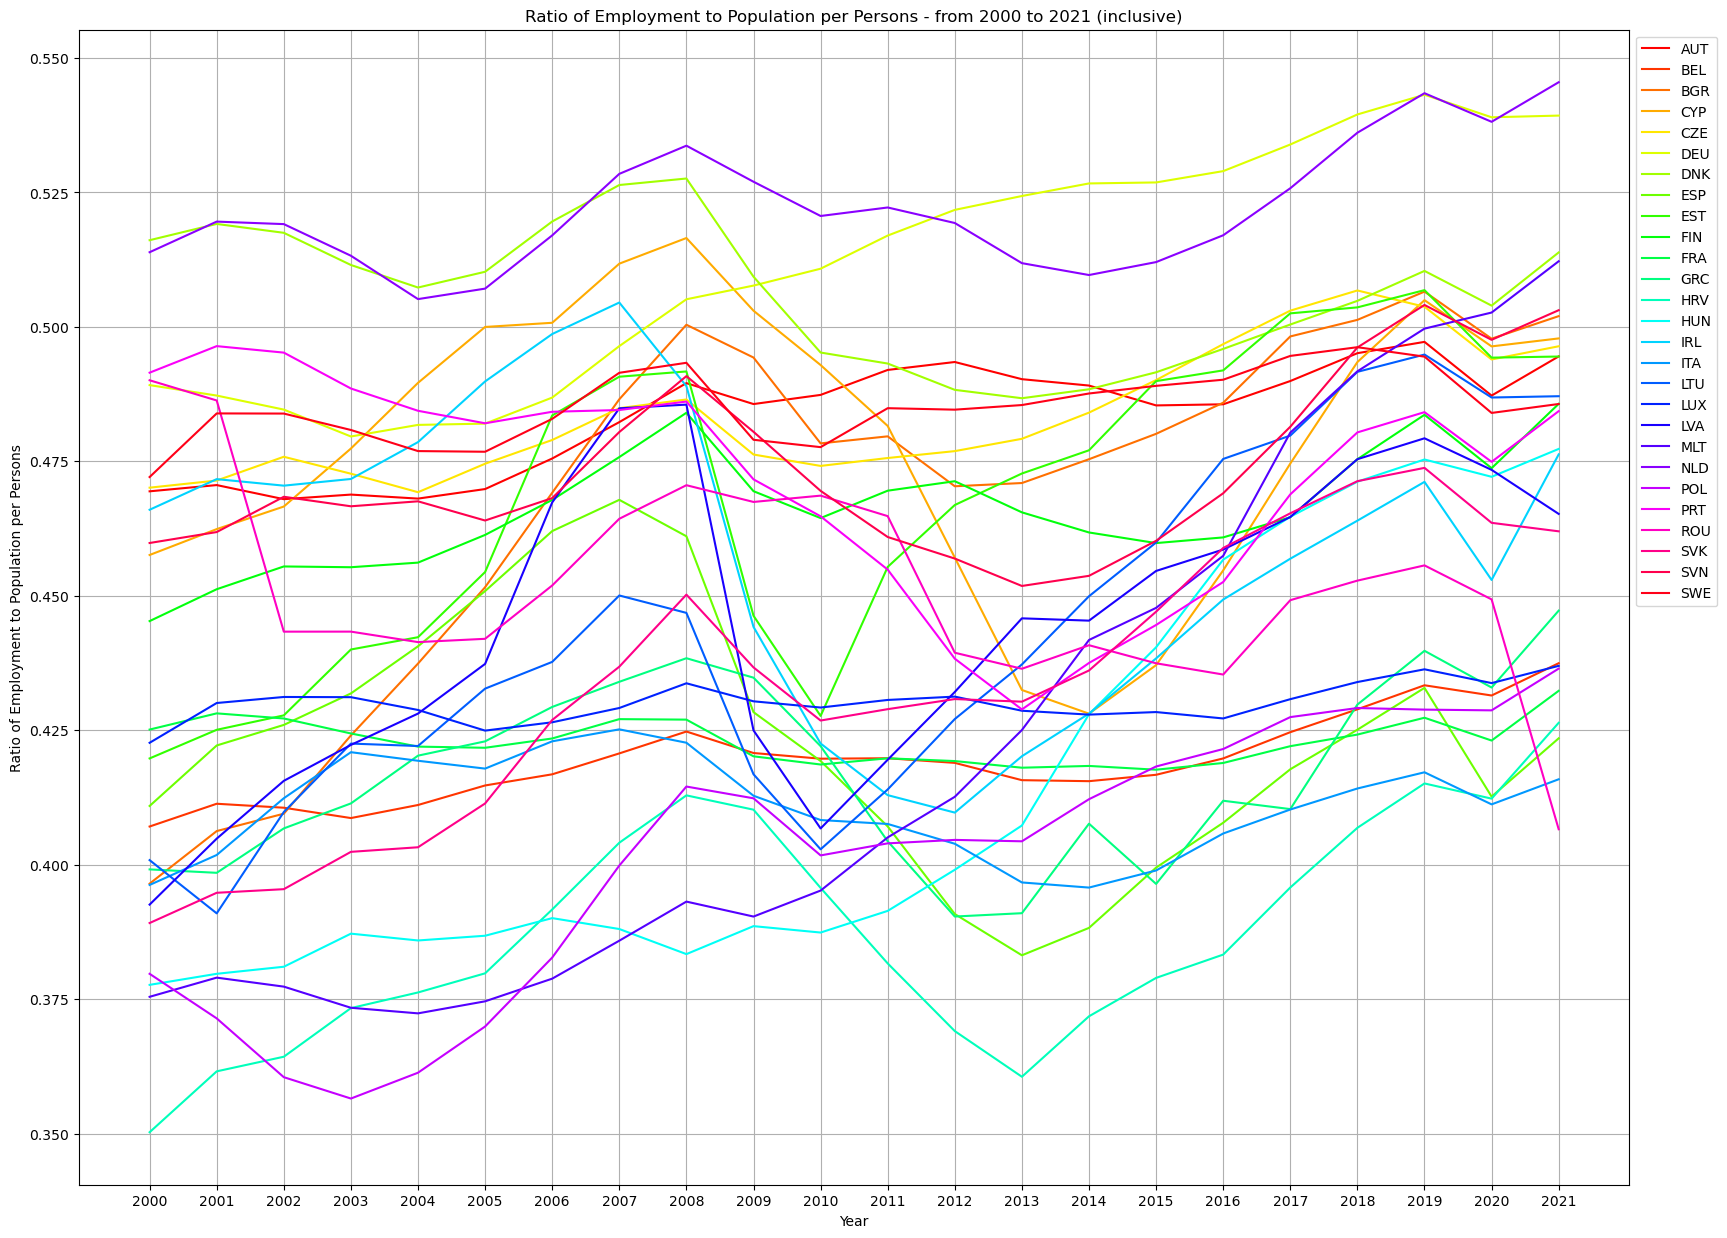

In [8]:
# plots every country's ratio of employment to population from 2000 to 2021
plt.figure(figsize=(20, 15))

colors = plt.cm.hsv(np.linspace(0, 1, df_etonc.shape[0]))
country_codes = df_etonc['LOCATION']
years = df_etonc.keys()[1:]
years_xticks = years.astype(int)

for i in range(len(country_codes)):
    countryCode = country_codes[i]
    # Plot years to Value
    plt.plot(years, df_etonc_ratio.loc[i, years], color=colors[i], label=countryCode)

plt.grid()
plt.xticks(years_xticks)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
plt.xlabel('Year') 
plt.ylabel('Ratio of Employment to Population per Persons')
plt.title("Ratio of Employment to Population per Persons - from 2000 to 2021 (inclusive)")
plt.show()

In [9]:
# Get the mean of the ratio of employment to population for all of the countries
df_etonc_ratio_mean = df_etonc_ratio.copy()
df_etonc_ratio_mean = df_etonc_ratio_mean.drop(columns=['LOCATION'])
df_etonc_ratio_mean = df_etonc_ratio_mean.mean(axis=0)
df_etonc_ratio_mean = df_etonc_ratio_mean.to_frame().T
df_etonc_ratio_mean

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0.432737,0.436563,0.437167,0.43924,0.440628,0.444862,0.45338,0.46155,0.465144,0.451438,...,0.44163,0.440759,0.445419,0.449886,0.456193,0.464357,0.47181,0.47641,0.469176,0.473535


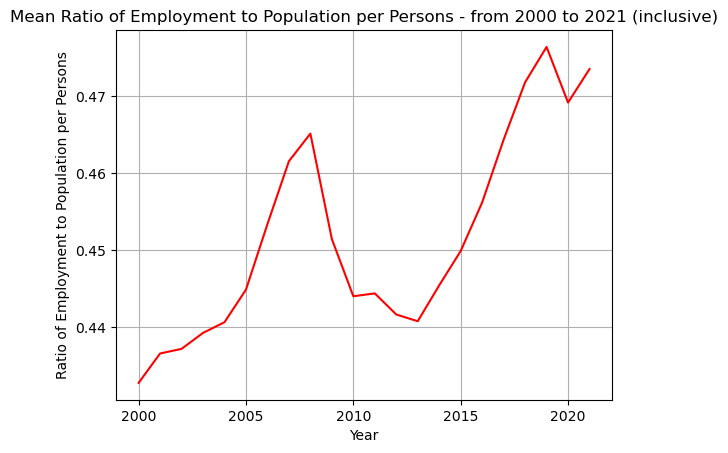

In [10]:
# plots the mean ratio of employment to population from 2000 to 2021
plt.plot(years, df_etonc_ratio_mean.loc[0, years], color='red', label='Mean')

plt.grid()
plt.xlabel('Year') 
plt.ylabel('Ratio of Employment to Population per Persons')
plt.title("Mean Ratio of Employment to Population per Persons - from 2000 to 2021 (inclusive)")
plt.show()

This graph is good because it is evident that 2008 and 2020 are when economic crashes happened

## Comparison of Total Employment and Labour Productivity

In [11]:
path = "../Datasets/cleaned_Productivity.csv"
df_labour = pd.read_csv(path)
df_labour.rename(columns=lambda x: int(x) if x.isdigit() else x, inplace=True)
df_labour.head()

,LOCATION,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,mean
0,AUS,43.813437,45.338482,46.025462,47.089456,46.931496,47.099677,47.342066,47.873036,49.523676,...,52.558753,52.780926,54.099648,53.945416,54.561035,54.559641,55.212012,56.214321,56.820351,50.587459
1,AUT,55.825179,56.533555,57.591558,58.071618,59.181589,60.632340,62.218785,63.814049,63.814456,...,66.080679,66.327394,67.267651,67.184974,67.999464,68.309455,68.309868,69.970148,69.634603,63.955261
2,BEL,63.089170,63.233672,63.667303,64.204011,66.278551,67.287921,67.637137,68.887444,68.464336,...,69.517696,70.513657,71.604653,71.674769,71.534022,71.681631,72.259271,74.541737,73.607184,68.830169
3,BGR,14.861829,15.438275,16.313284,16.783858,17.182034,17.965425,18.618248,19.229785,19.475667,...,22.460713,22.607390,23.296069,23.897609,24.130056,24.784139,25.687153,25.775778,26.559335,20.905039
4,CAN,44.249048,44.960465,45.686833,45.787448,46.167149,47.187987,47.742663,47.802103,47.658733,...,50.068609,51.425818,51.340885,51.524774,52.346352,52.543577,52.996192,56.971404,53.969872,49.328641


In [12]:
df_labour = df_labour[df_labour['LOCATION'].isin(get_alpha_3_list())]
df_labour.reset_index(drop=True, inplace=True)
df_labour.head()

,LOCATION,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,mean
0,AUT,55.825179,56.533555,57.591558,58.071618,59.181589,60.632340,62.218785,63.814049,63.814456,...,66.080679,66.327394,67.267651,67.184974,67.999464,68.309455,68.309868,69.970148,69.634603,63.955261
1,BEL,63.089170,63.233672,63.667303,64.204011,66.278551,67.287921,67.637137,68.887444,68.464336,...,69.517696,70.513657,71.604653,71.674769,71.534022,71.681631,72.259271,74.541737,73.607184,68.830169
2,BGR,14.861829,15.438275,16.313284,16.783858,17.182034,17.965425,18.618248,19.229785,19.475667,...,22.460713,22.607390,23.296069,23.897609,24.130056,24.784139,25.687153,25.775778,26.559335,20.905039
3,CZE,25.998047,27.994158,28.429678,29.901424,31.147574,32.765277,34.781571,36.256014,36.139167,...,37.004724,37.432375,39.390083,39.251558,40.595969,41.161265,42.272668,43.289836,43.487932,36.016020
4,DEU,56.051436,57.459100,57.991792,58.437853,58.970058,59.900695,60.858653,61.577685,61.593702,...,63.392823,64.049842,64.376152,65.248665,66.411797,66.549287,67.055996,67.714113,68.303361,62.390872


In [13]:
# Get the mean labour productivity
df_labour_mean = df_labour.copy()
df_labour_mean.drop(columns=['mean'], inplace=True)
df_labour_mean = df_labour_mean.mean(numeric_only=True, axis=0)
df_labour_mean = df_labour_mean.to_frame().T
df_labour_mean

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,40.567788,41.355559,42.344206,43.293342,44.548287,45.551704,46.767592,47.874305,47.605473,47.046416,...,49.353596,49.746077,50.258789,51.588569,51.838212,52.870522,53.517315,54.254632,55.729785,56.628275


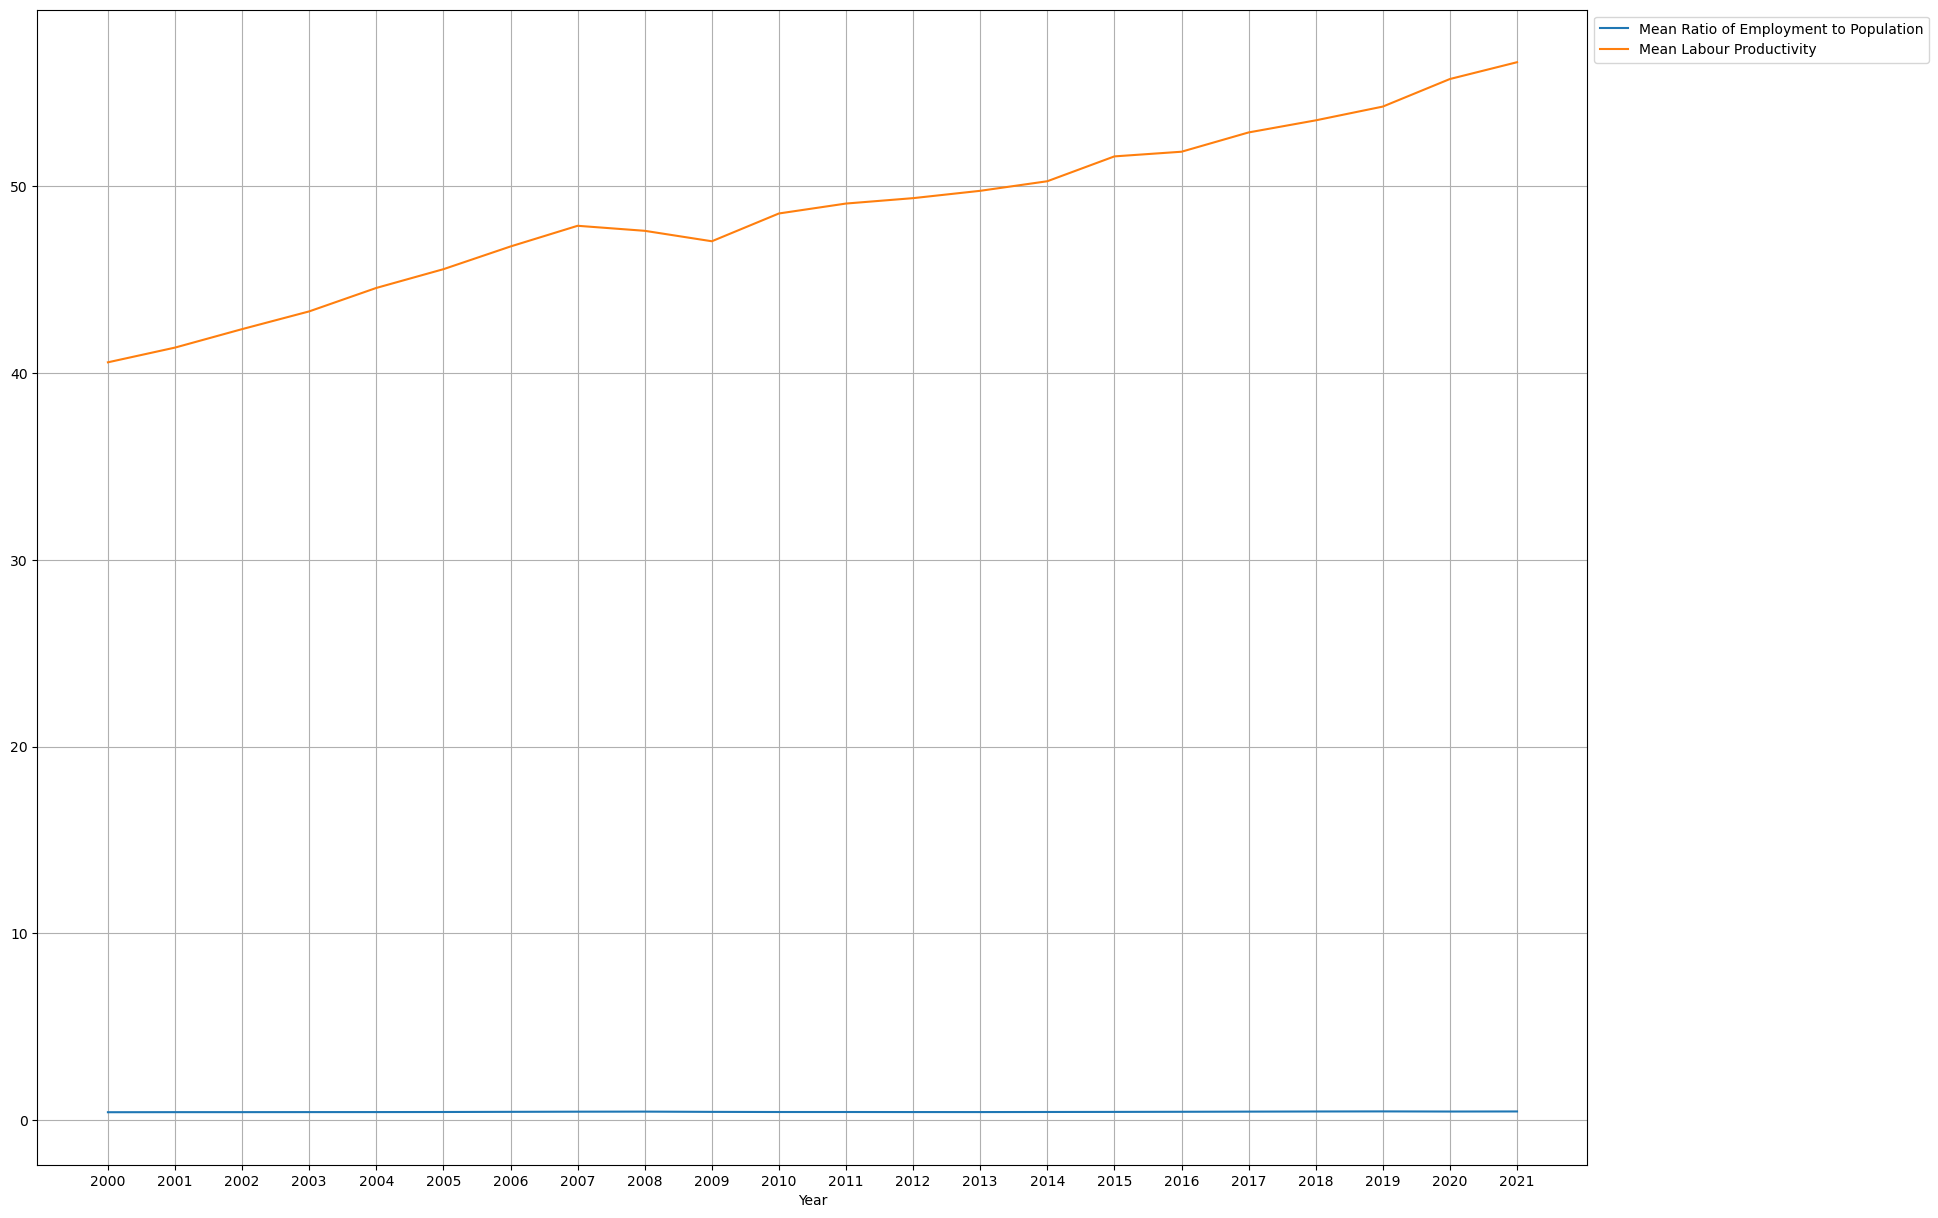

In [14]:
# Plot the mean employment ratio and mean labour productivity together
plt.figure(figsize=(20, 15))
plt.plot(years, df_etonc_ratio_mean.values[0], label="Mean Ratio of Employment to Population")
plt.plot(years, df_labour_mean.values[0], label="Mean Labour Productivity")
plt.grid()
plt.xticks(years_xticks)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
plt.xlabel('Year')
plt.show()

In [15]:
# So there are fewer country codes for the labour productivity dataset, so pick the least amount of country codes
arr1 = [cd for cd in df_etonc['LOCATION']]
arr2 = [cd for cd in df_labour['LOCATION']]
country_codes = arr1 if len(arr1) < len(arr2) else arr2

In [16]:
# Join tables together
df_countries = pd.DataFrame(columns=['Year', 'Country', 'Labour Productivity', 'Employment Ratio'])
for i in range(len(country_codes)):
    tmp_dict = {}
    countryCode = country_codes[i]
    for year in years:
        tmp_dict[year] = [df_labour.loc[i, year], df_etonc_ratio.loc[i, year]]
    df_country = pd.DataFrame.from_dict(tmp_dict, orient='index', columns=['Labour Productivity', 'Employment Ratio'])
    df_country['Year'] = df_country.index
    df_country['Country'] = countryCode

    df_countries = pd.concat([df_countries, df_country], axis=0)
df_countries.reset_index(drop=True, inplace=True)


In [17]:
# Look at correlation between labour productivity and employment ratio
df_countries.corr(numeric_only=True)

,Labour Productivity,Employment Ratio
Labour Productivity,1.000000,0.227001
Employment Ratio,0.227001,1.000000


In [18]:
# Look at correlation between labour productivity and employment ratio for each country
df_countries.groupby(df_countries['Country']).corr(numeric_only=True)

Labour Productivity  Employment Ratio
Country                                                           
AUT     Labour Productivity             1.000000          0.893629
        Employment Ratio                0.893629          1.000000
BEL     Labour Productivity             1.000000          0.845895
        Employment Ratio                0.845895          1.000000
BGR     Labour Productivity             1.000000          0.846368
        Employment Ratio                0.846368          1.000000
CZE     Labour Productivity             1.000000          0.158236
        Employment Ratio                0.158236          1.000000
DEU     Labour Productivity             1.000000          0.876175
        Employment Ratio                0.876175          1.000000
DNK     Labour Productivity             1.000000          0.924641
        Employment Ratio                0.924641          1.000000
ESP     Labour Productivity             1.000000         -0.637213
        Employment Ratio               -0.637213          1.000000
EST     Labour Productivity             1.000000         -0.232165
        Employment Ratio               -0.232165          1.000000
FIN     Labour Productivity             1.000000          0.887825
        Employment Ratio                0.887825          1.000000
FRA     Labour Productivity             1.000000          0.671644
        Employment Ratio                0.671644          1.000000
GRC     Labour Productivity             1.000000          0.084808
        Employment Ratio                0.084808          1.000000
HRV     Labour Productivity             1.000000          0.324249
        Employment Ratio                0.324249          1.000000
HUN     Labour Productivity             1.000000          0.756203
        Employment Ratio                0.756203          1.000000
IRL     Labour Productivity             1.000000          0.940676
        Employment Ratio                0.940676          1.000000
ITA     Labour Productivity             1.000000          0.023646
        Employment Ratio                0.023646          1.000000
LTU     Labour Productivity             1.000000         -0.015667
        Employment Ratio               -0.015667          1.000000
LUX     Labour Productivity             1.000000          0.316335
        Employment Ratio                0.316335          1.000000
LVA     Labour Productivity             1.000000          0.578293
        Employment Ratio                0.578293          1.000000
NLD     Labour Productivity             1.000000          0.715835
        Employment Ratio                0.715835          1.000000
POL     Labour Productivity             1.000000          0.958753
        Employment Ratio                0.958753          1.000000
PRT     Labour Productivity             1.000000          0.519065
        Employment Ratio                0.519065          1.000000
ROU     Labour Productivity             1.000000          0.923276
        Employment Ratio                0.923276          1.000000
SVK     Labour Productivity             1.000000         -0.448368
        Employment Ratio               -0.448368          1.000000
SVN     Labour Productivity             1.000000         -0.440457
        Employment Ratio               -0.440457          1.000000
SWE     Labour Productivity             1.000000          0.917180
        Employment Ratio                0.917180          1.000000

In [19]:
# REFERENCE: https://www.statology.org/granger-causality-test-in-python/
# Use Granger Causality tests to compare the means
df_mean = pd.DataFrame(columns=['Labour Productivity', 'Employment Ratio'])
df_mean['Labour Productivity'] = df_labour_mean.values[0]
df_mean['Employment Ratio'] = df_etonc_ratio_mean.values[0]
results = grangercausalitytests(df_mean, maxlag=2, verbose=False)

# If the p-value is less than 0.05, then the null hypothesis is rejected and there is a Granger Causality
if results.get(1)[0]['ssr_ftest'][1] < 0.05:
    print('Ratio of employment to population is a predictor variable of Labour Productivity')

results = grangercausalitytests(df_mean[['Employment Ratio', 'Labour Productivity']], maxlag=2, verbose=False)

# If the p-value is less than 0.05, then the null hypothesis is rejected and there is a Granger Causality
if results.get(1)[0]['ssr_ftest'][1] < 0.05:
    print('Labour Productivity is a predictor variable of Ratio of employment to population')

Since there is no Granger Causality for either of these variables, we can conclude that there is no causality between them.

## Comparison of different job sectors over time

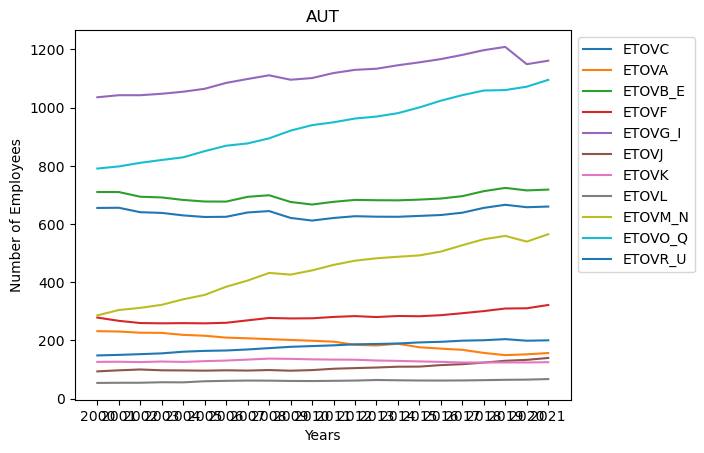

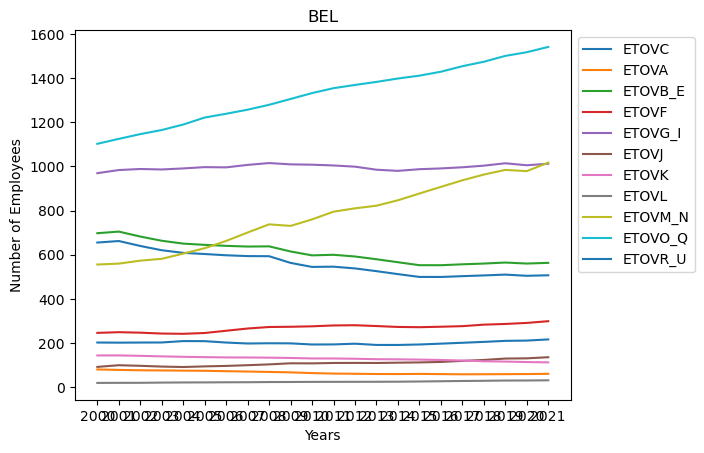

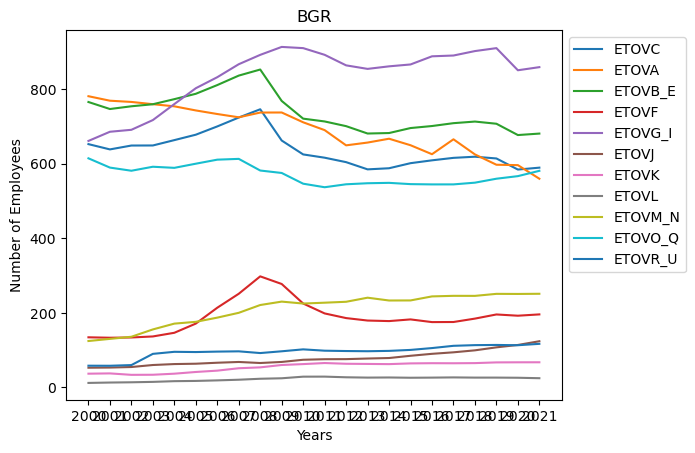

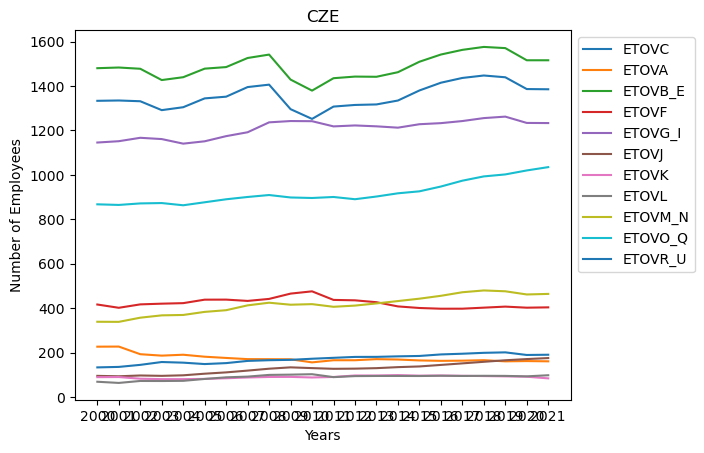

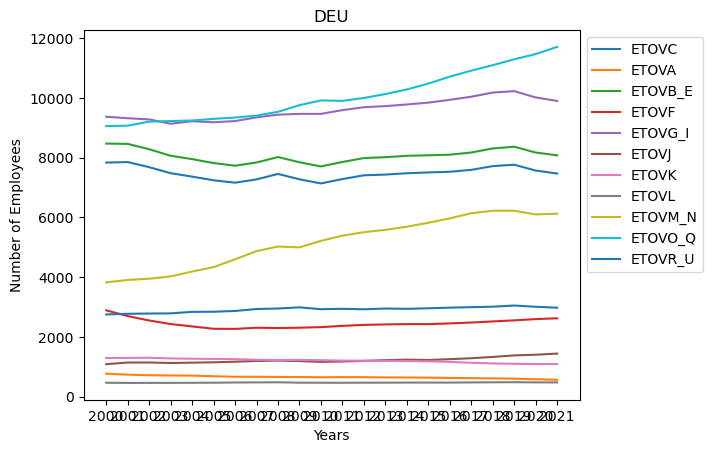

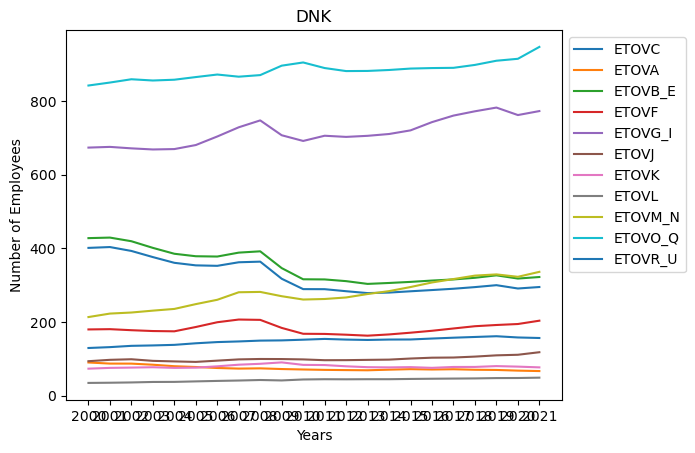

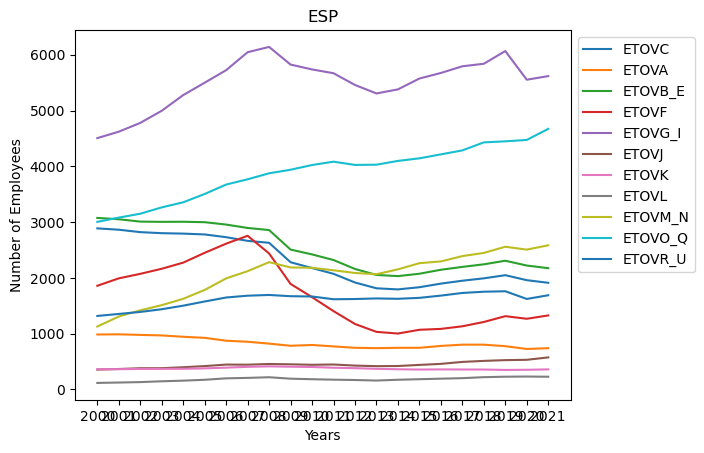

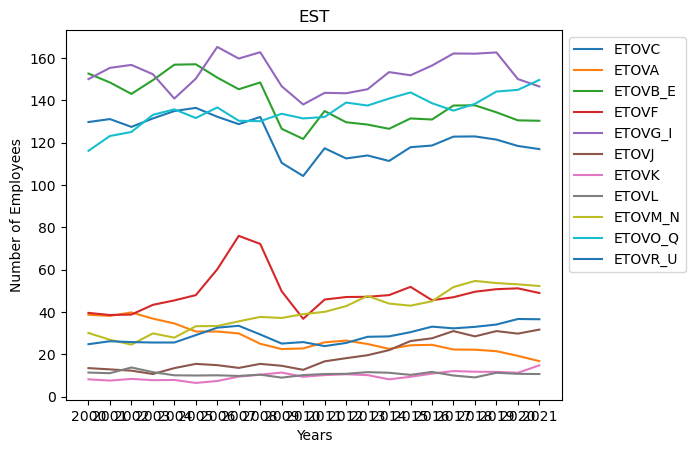

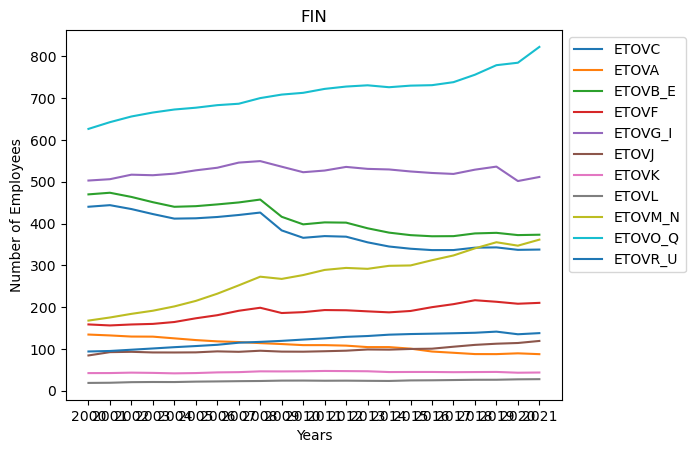

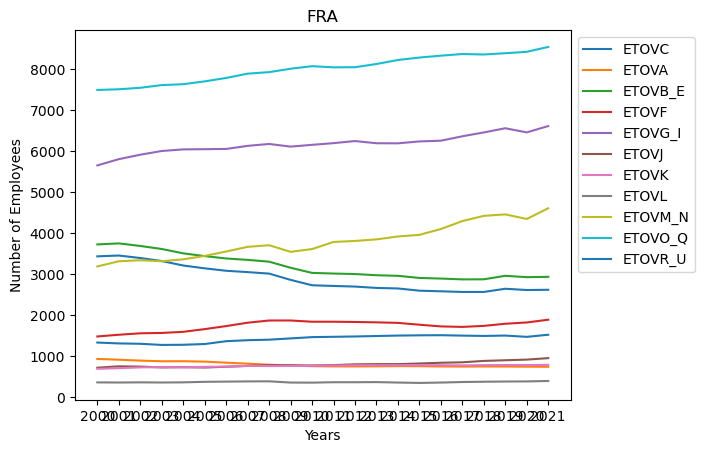

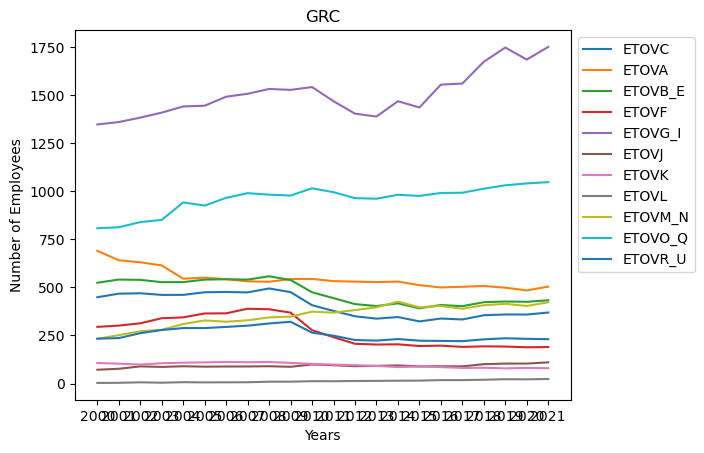

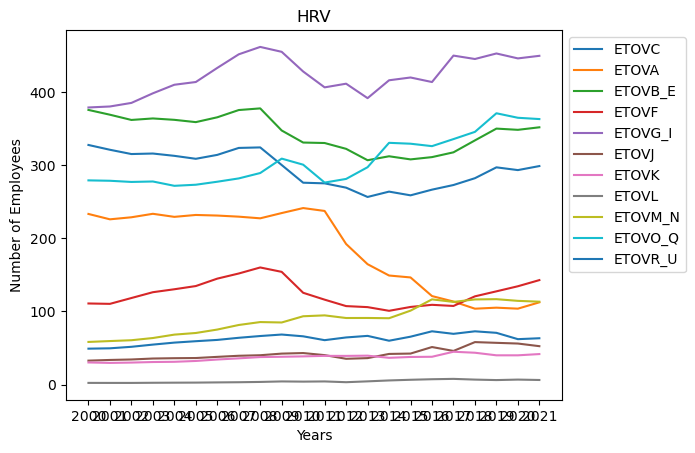

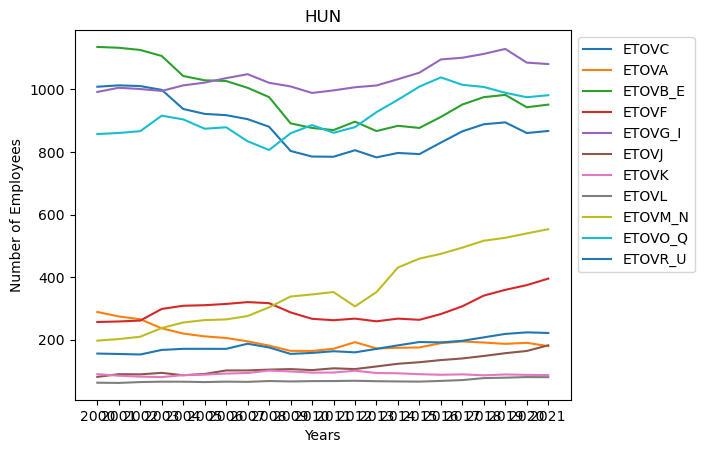

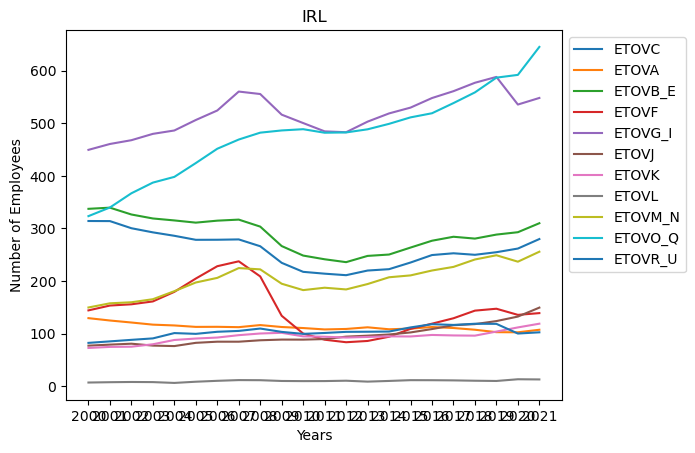

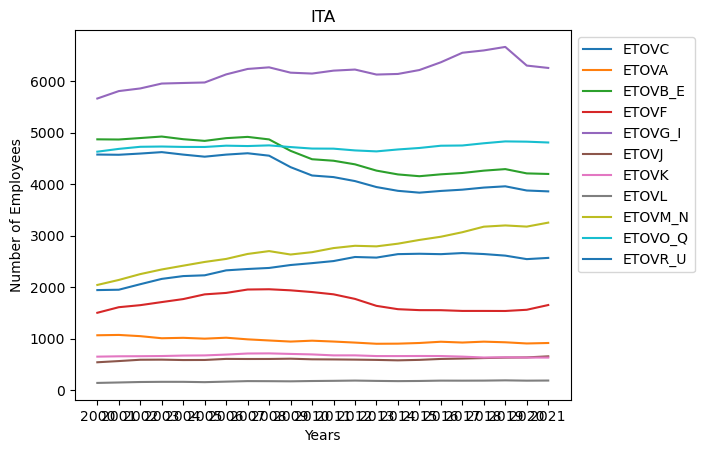

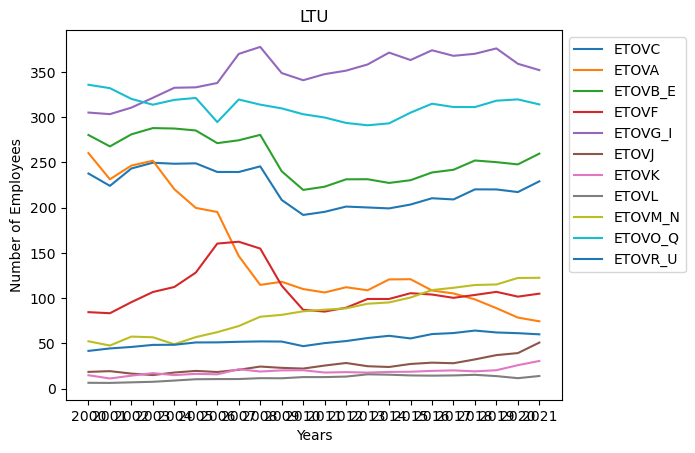

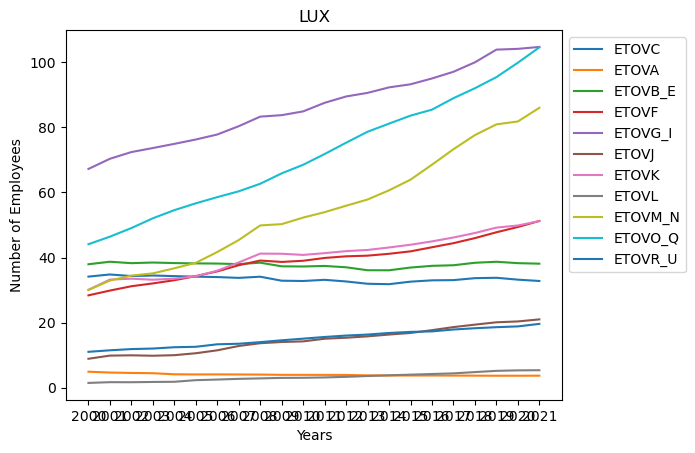

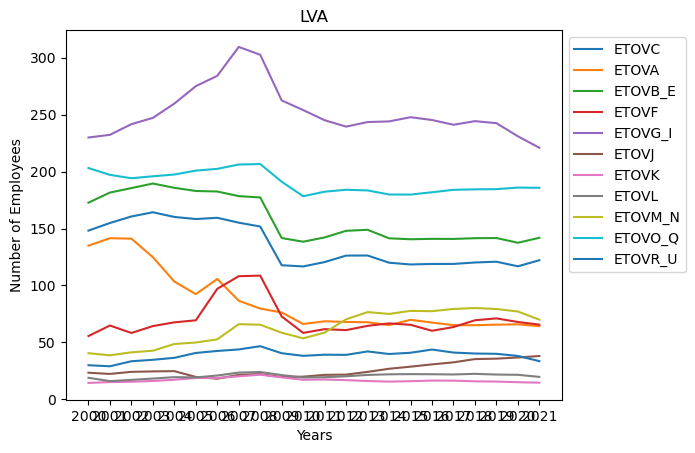

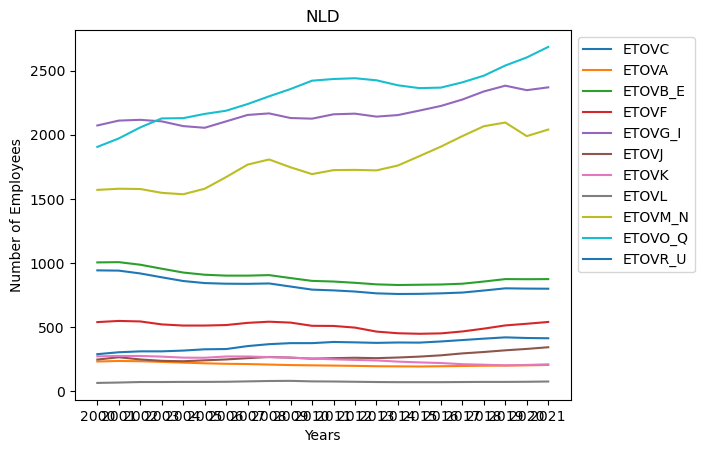

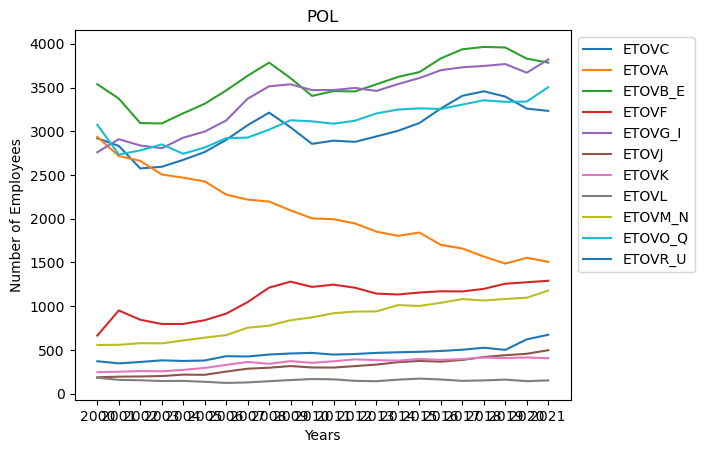

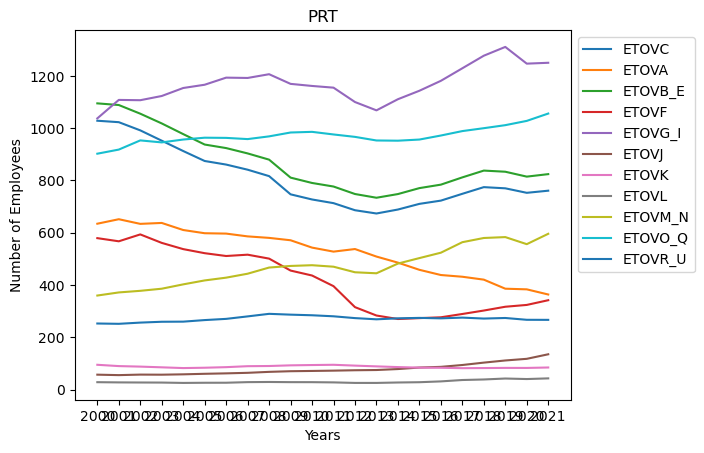

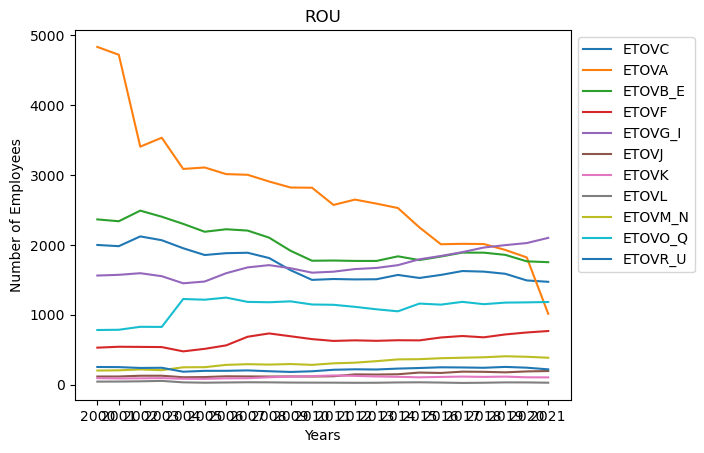

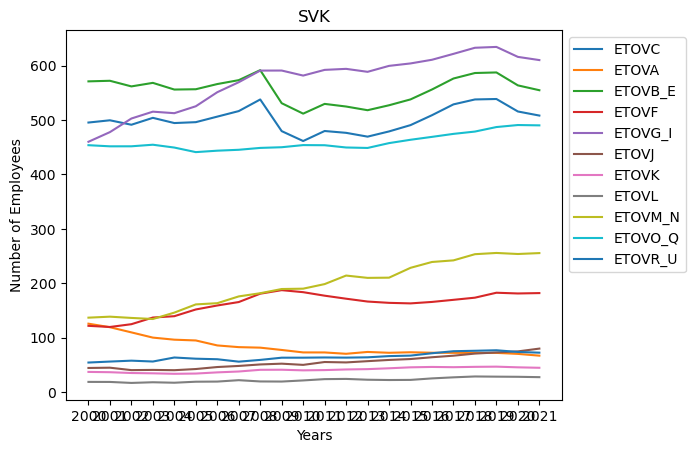

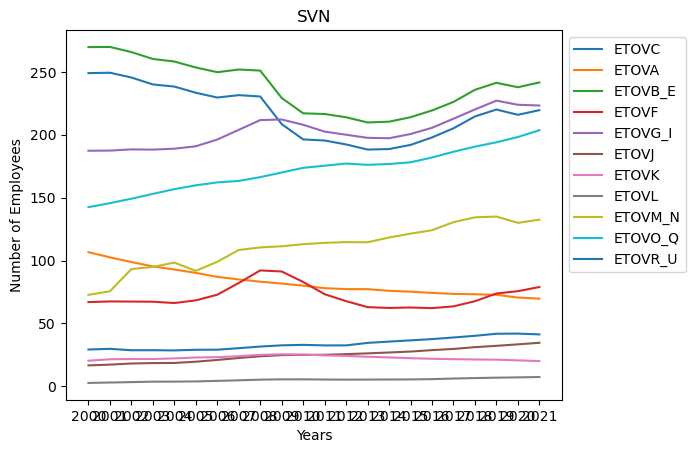

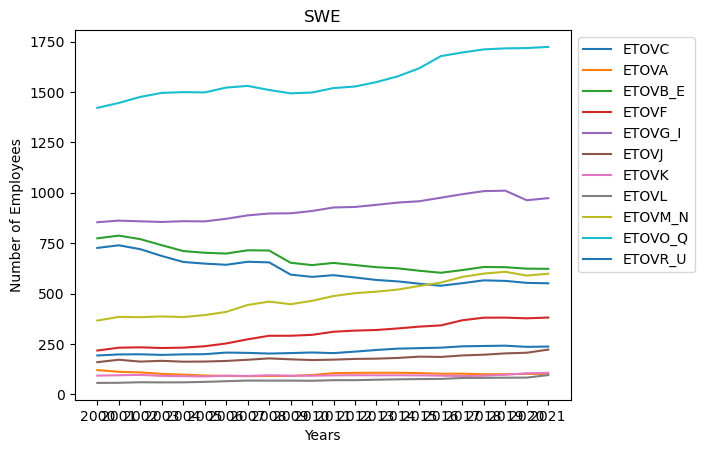

In [20]:
# For each country, see how the employment industry changes over time
df_etov = df_2000[df_2000['TRANSACT'].str.contains('ETOV')]
industry_codes = df_etov['TRANSACT'].unique()

for i in range(len(country_codes)):
    countryCode = country_codes[i]
    for j in range(len(industry_codes)):
        industryCode = industry_codes[j]
        df_country = df_etov[df_etov['LOCATION'] == countryCode]
        df_country = df_country[df_country['TRANSACT'] == industryCode]
        df_country = df_country[df_country['TIME'].isin(years)]
        df_country = df_country.set_index('TIME')
        df_country = df_country.drop(['LOCATION', 'TRANSACT'], axis=1)
        plt.plot(years, df_country['Value'], label=industryCode)
        plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
    plt.xlabel("Years")
    plt.ylabel("Number of Employees")
    plt.title(countryCode)
    plt.xticks(years_xticks)
    plt.show()

In [21]:
# Get the total number of employees in each industry through time
df_industries = df_etov.groupby(['TRANSACT', 'TIME'],as_index=False).sum(numeric_only=True)
df_industries.head()

,TRANSACT,TIME,Year,PowerCode Code,Reference Period Code,Reference Period,Value
0,ETOVA,2000,80000,120,0.0,0.0,63690.018344
1,ETOVA,2001,80040,120,0.0,0.0,61529.125189
2,ETOVA,2002,80080,120,0.0,0.0,58579.171796
3,ETOVA,2003,80120,120,0.0,0.0,58246.834992
4,ETOVA,2004,82164,123,0.0,0.0,59672.541688


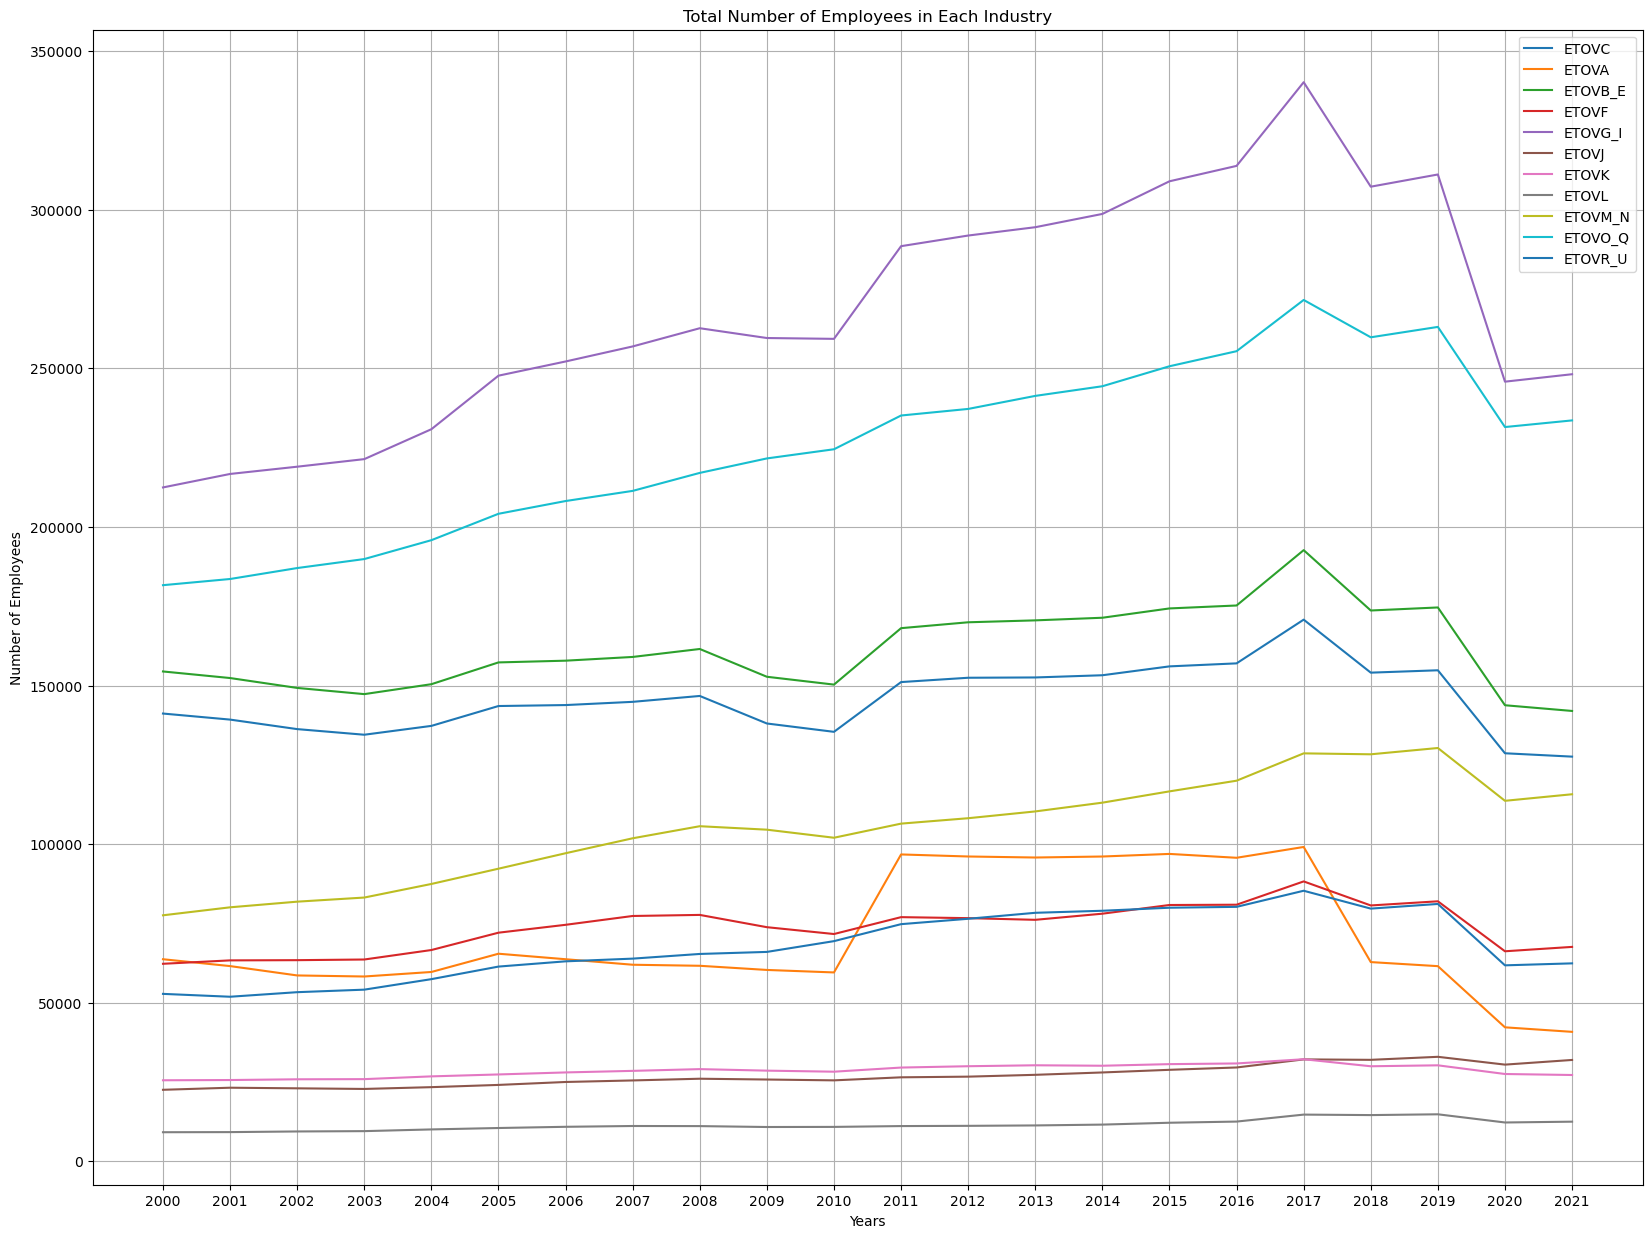

In [22]:
plt.figure(figsize=(20, 15))
for i in range(len(industry_codes)):
    industryCode = industry_codes[i]
    df_industry = df_industries[df_industries['TRANSACT'] == industryCode]
    df_industry = df_industry[df_industry['TIME'].isin(years)]
    df_industry = df_industry.set_index('TIME')
    df_industry = df_industry.drop(['TRANSACT'], axis=1)
    plt.plot(years, df_industry['Value'], label=industryCode)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
plt.grid()
plt.xticks(years_xticks)
plt.xlabel("Years")
plt.ylabel("Number of Employees")
plt.title("Total Number of Employees in Each Industry")
plt.show()

Interesting enough, there is a sudden increase in all of the industries around 2017, just to fall back down. But no other information seems to support this, so no idea what is going on

## Comparison of Employee vs Self-Employed

In [23]:
df_eemncs = df_2000[df_2000['TRANSACT'].str.contains('EEMNC')]
df_esenc = df_2000[df_2000['TRANSACT'].str.contains('ESENC')]

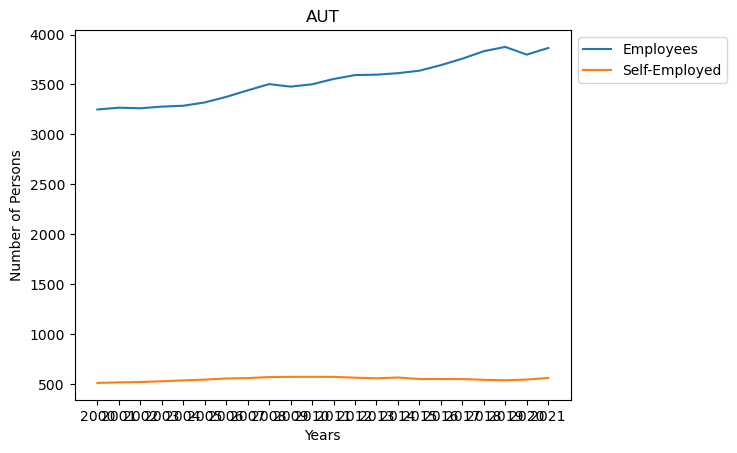

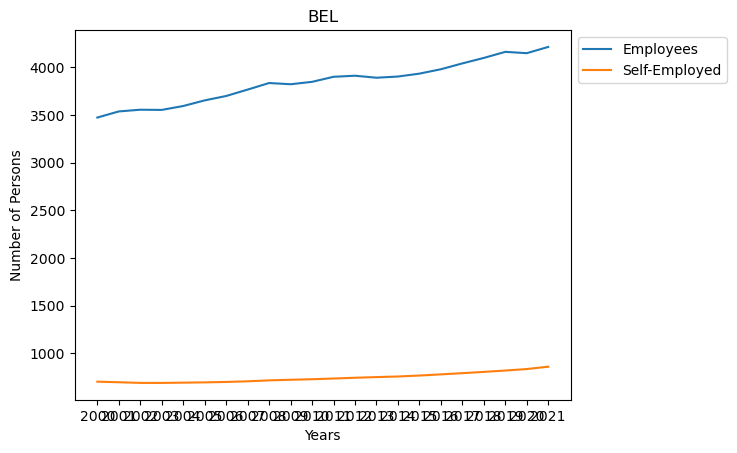

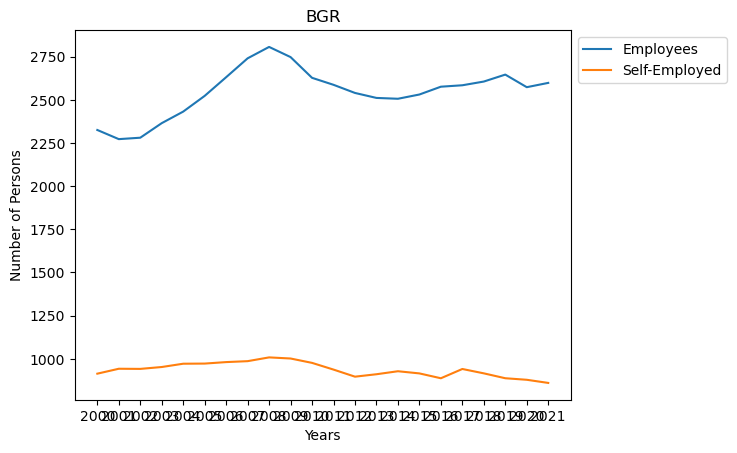

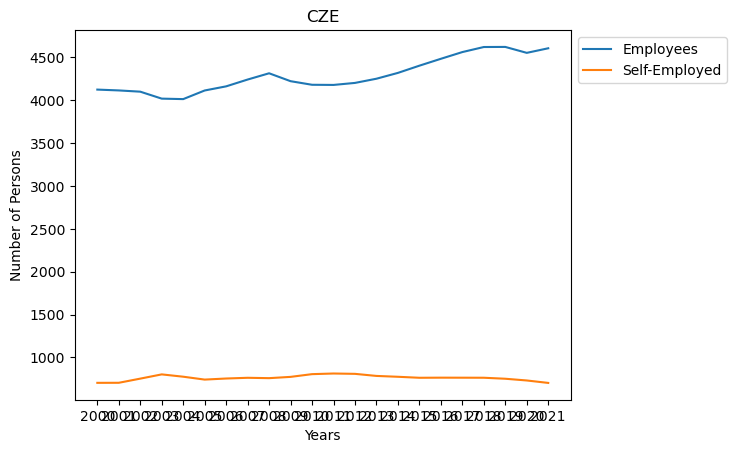

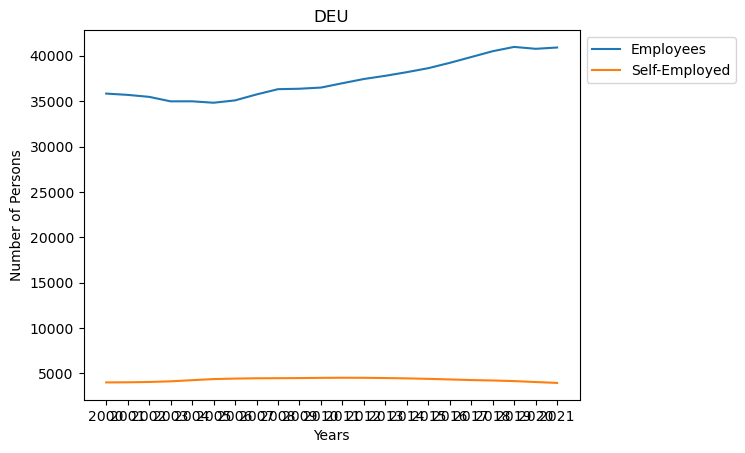

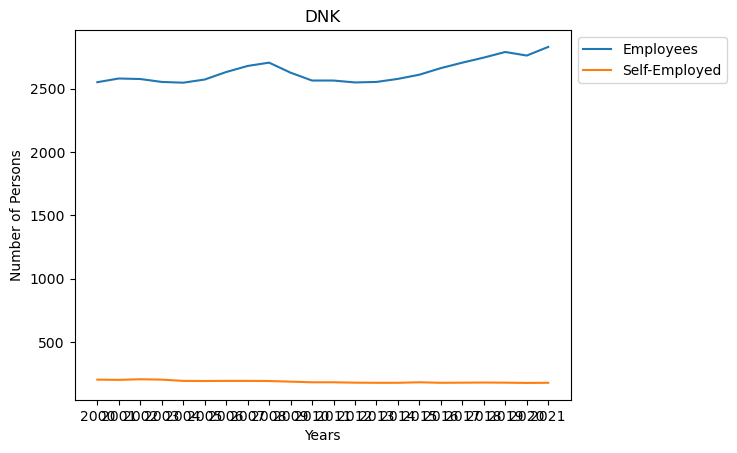

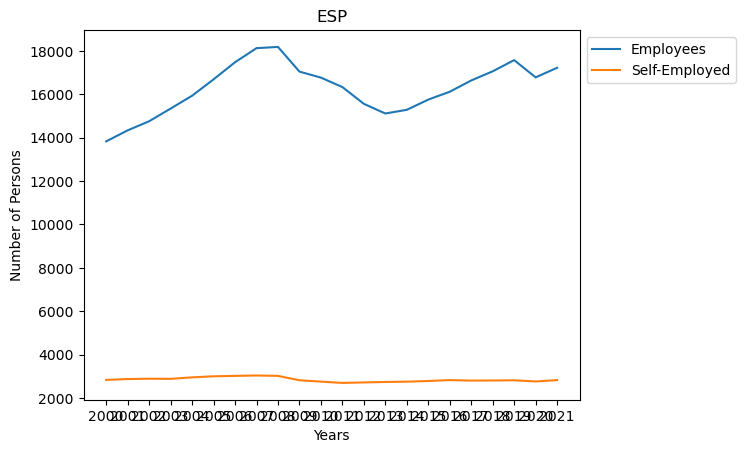

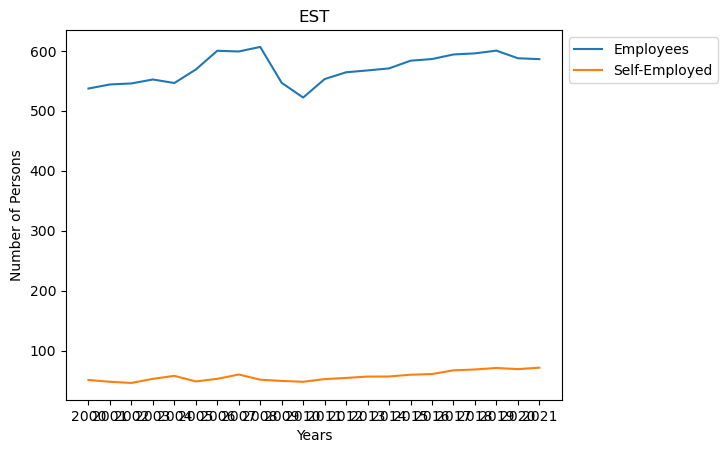

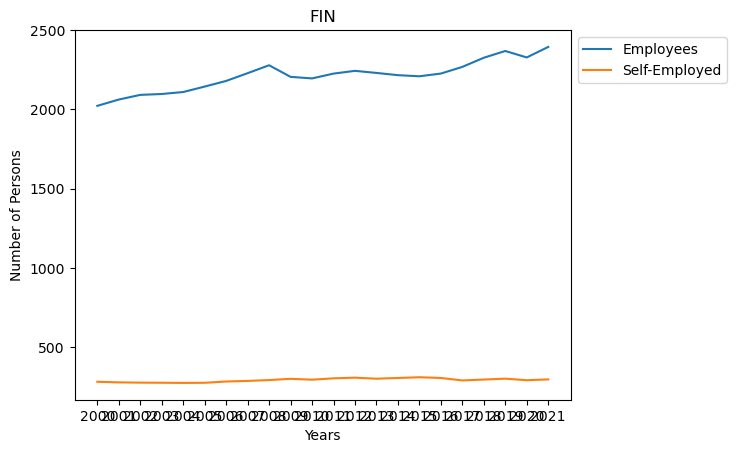

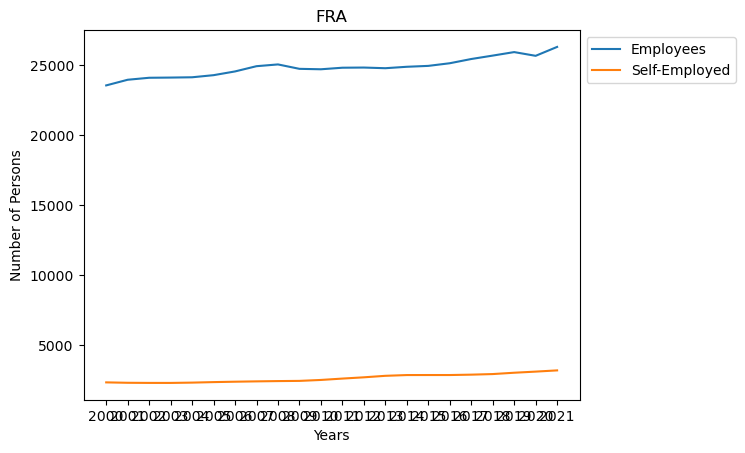

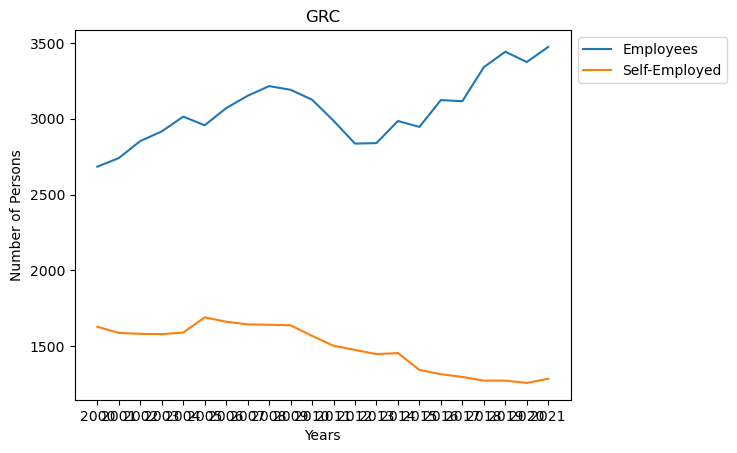

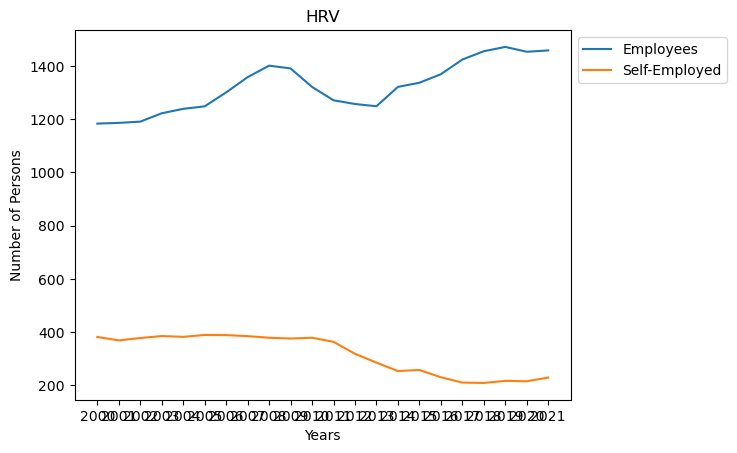

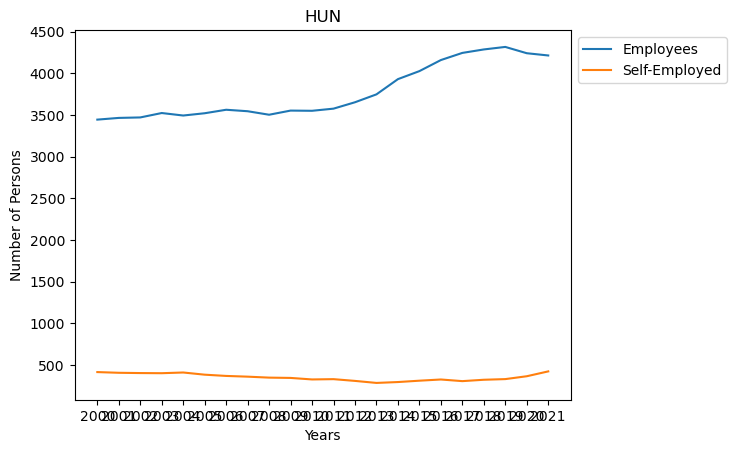

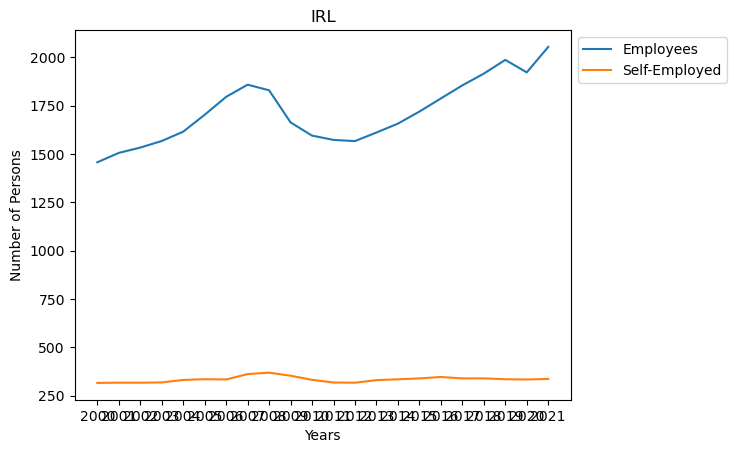

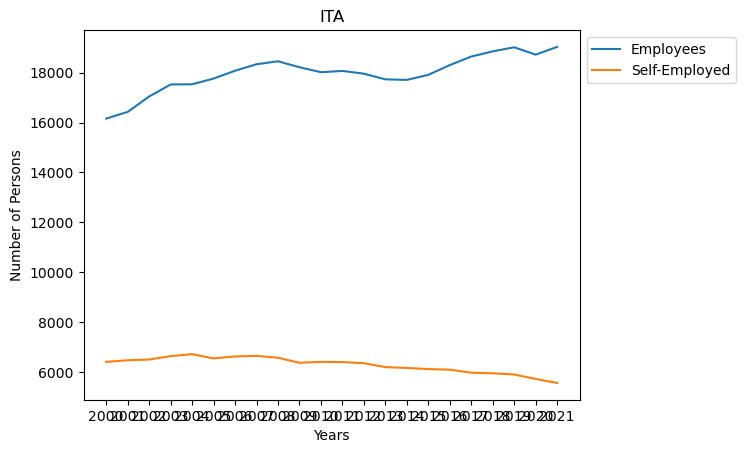

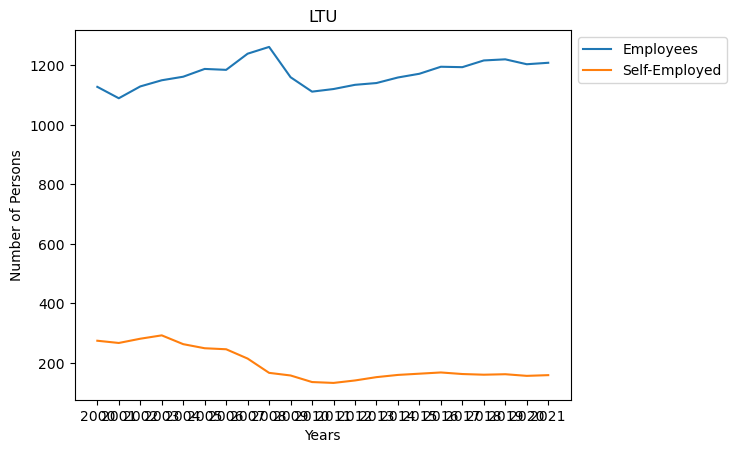

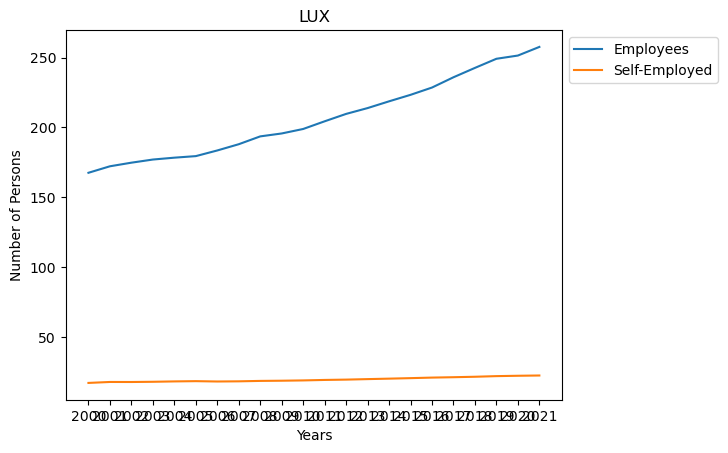

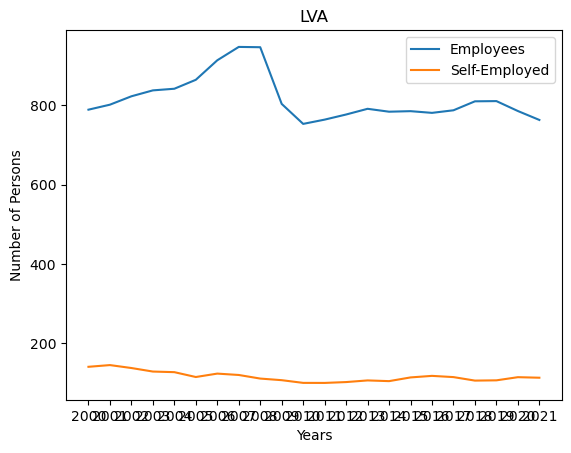

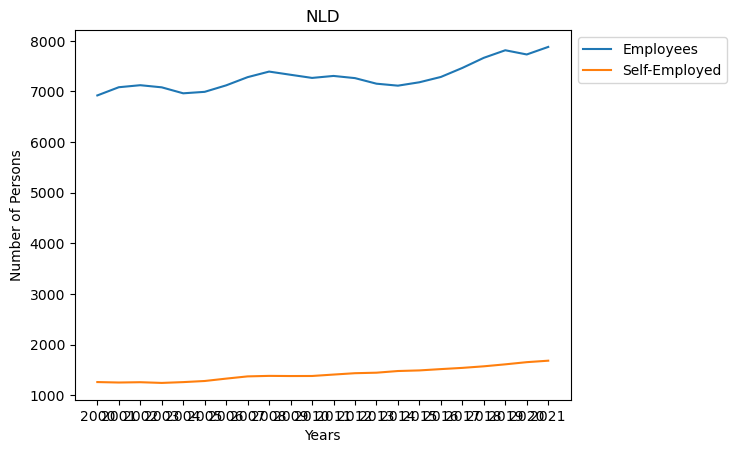

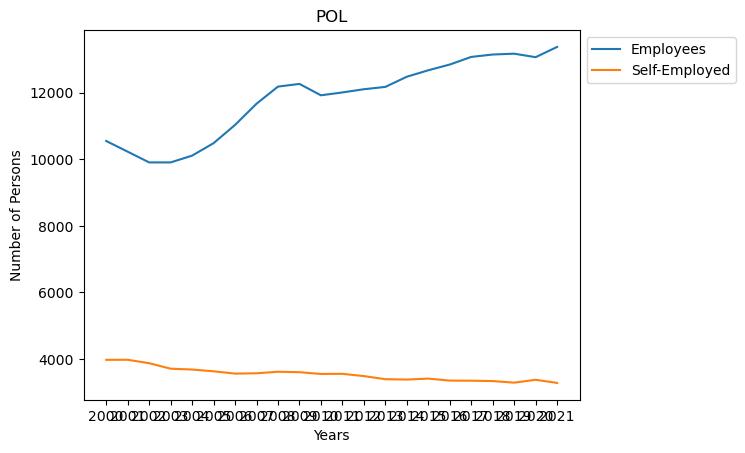

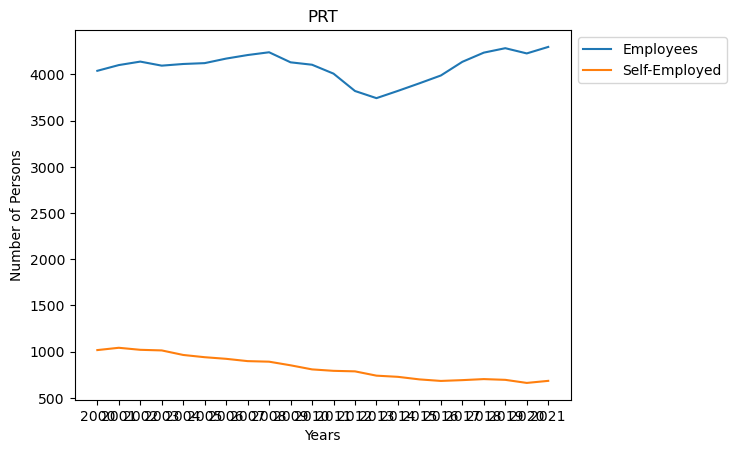

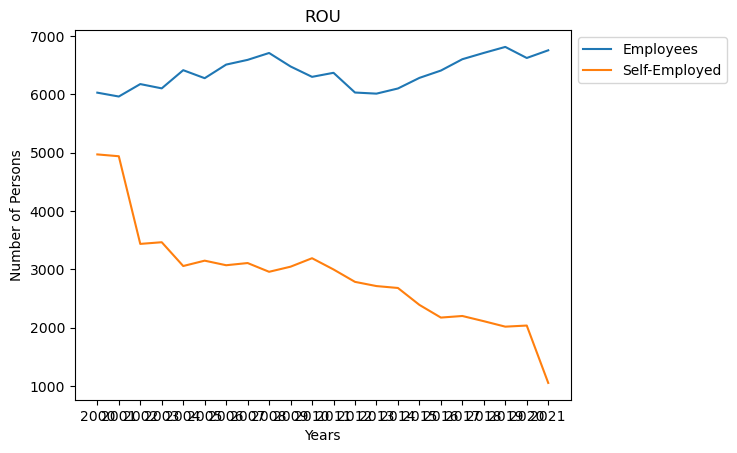

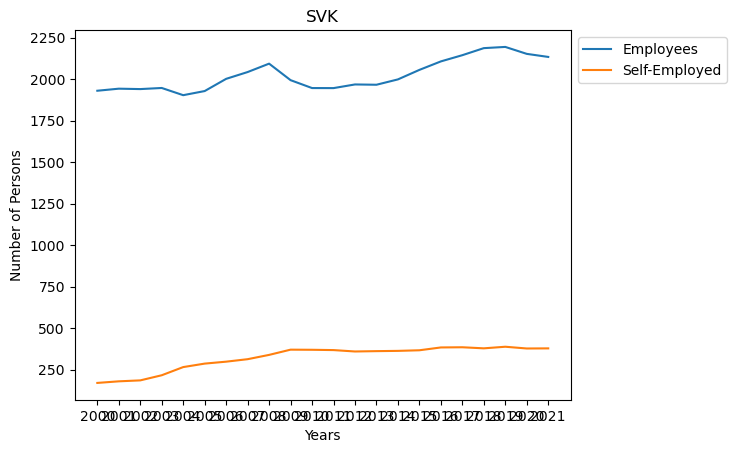

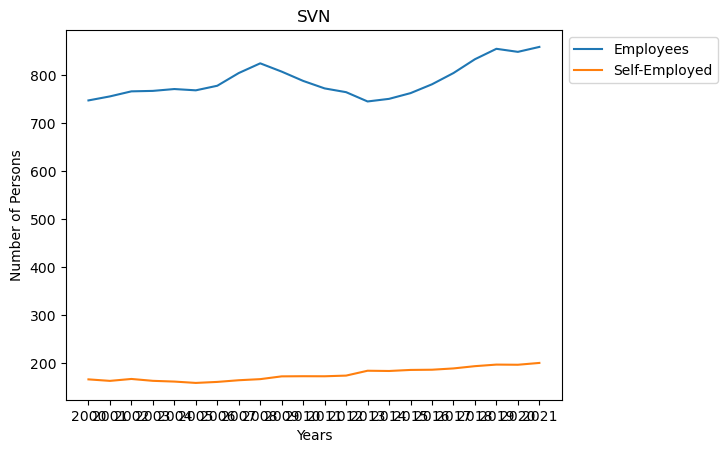

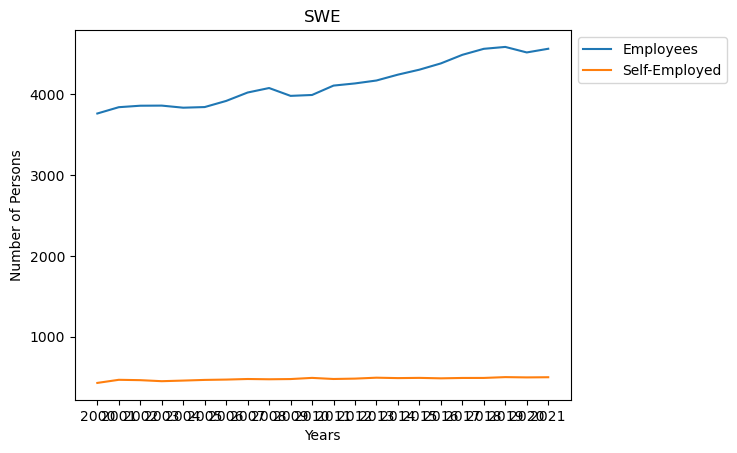

In [24]:
# For each country, see employees vs self-employed
for i in range(len(country_codes)):
    countryCode = country_codes[i]
    df_country = df_eemncs[df_eemncs['LOCATION'] == countryCode]
    df_country = df_country[df_country['TIME'].isin(years)]
    df_country = df_country.set_index('TIME')
    df_country = df_country.drop(['LOCATION', 'TRANSACT'], axis=1)
    plt.plot(years, df_country['Value'], label='Employees')

    df_country = df_esenc[df_esenc['LOCATION'] == countryCode]
    df_country = df_country[df_country['TIME'].isin(years)]
    df_country = df_country.set_index('TIME')
    df_country = df_country.drop(['LOCATION', 'TRANSACT'], axis=1)
    plt.plot(years, df_country['Value'], label='Self-Employed')

    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
    plt.xlabel("Years")
    plt.ylabel("Number of Persons")
    plt.title(countryCode)
    plt.xticks(years_xticks)
    plt.show()

In [25]:
# Get the employees vs self-employed through time
df_eemncs_sum = df_eemncs.groupby(['TRANSACT', 'TIME'],as_index=False).sum(numeric_only=True)
df_esenc_sum = df_esenc.groupby(['TRANSACT', 'TIME'],as_index=False).sum(numeric_only=True)

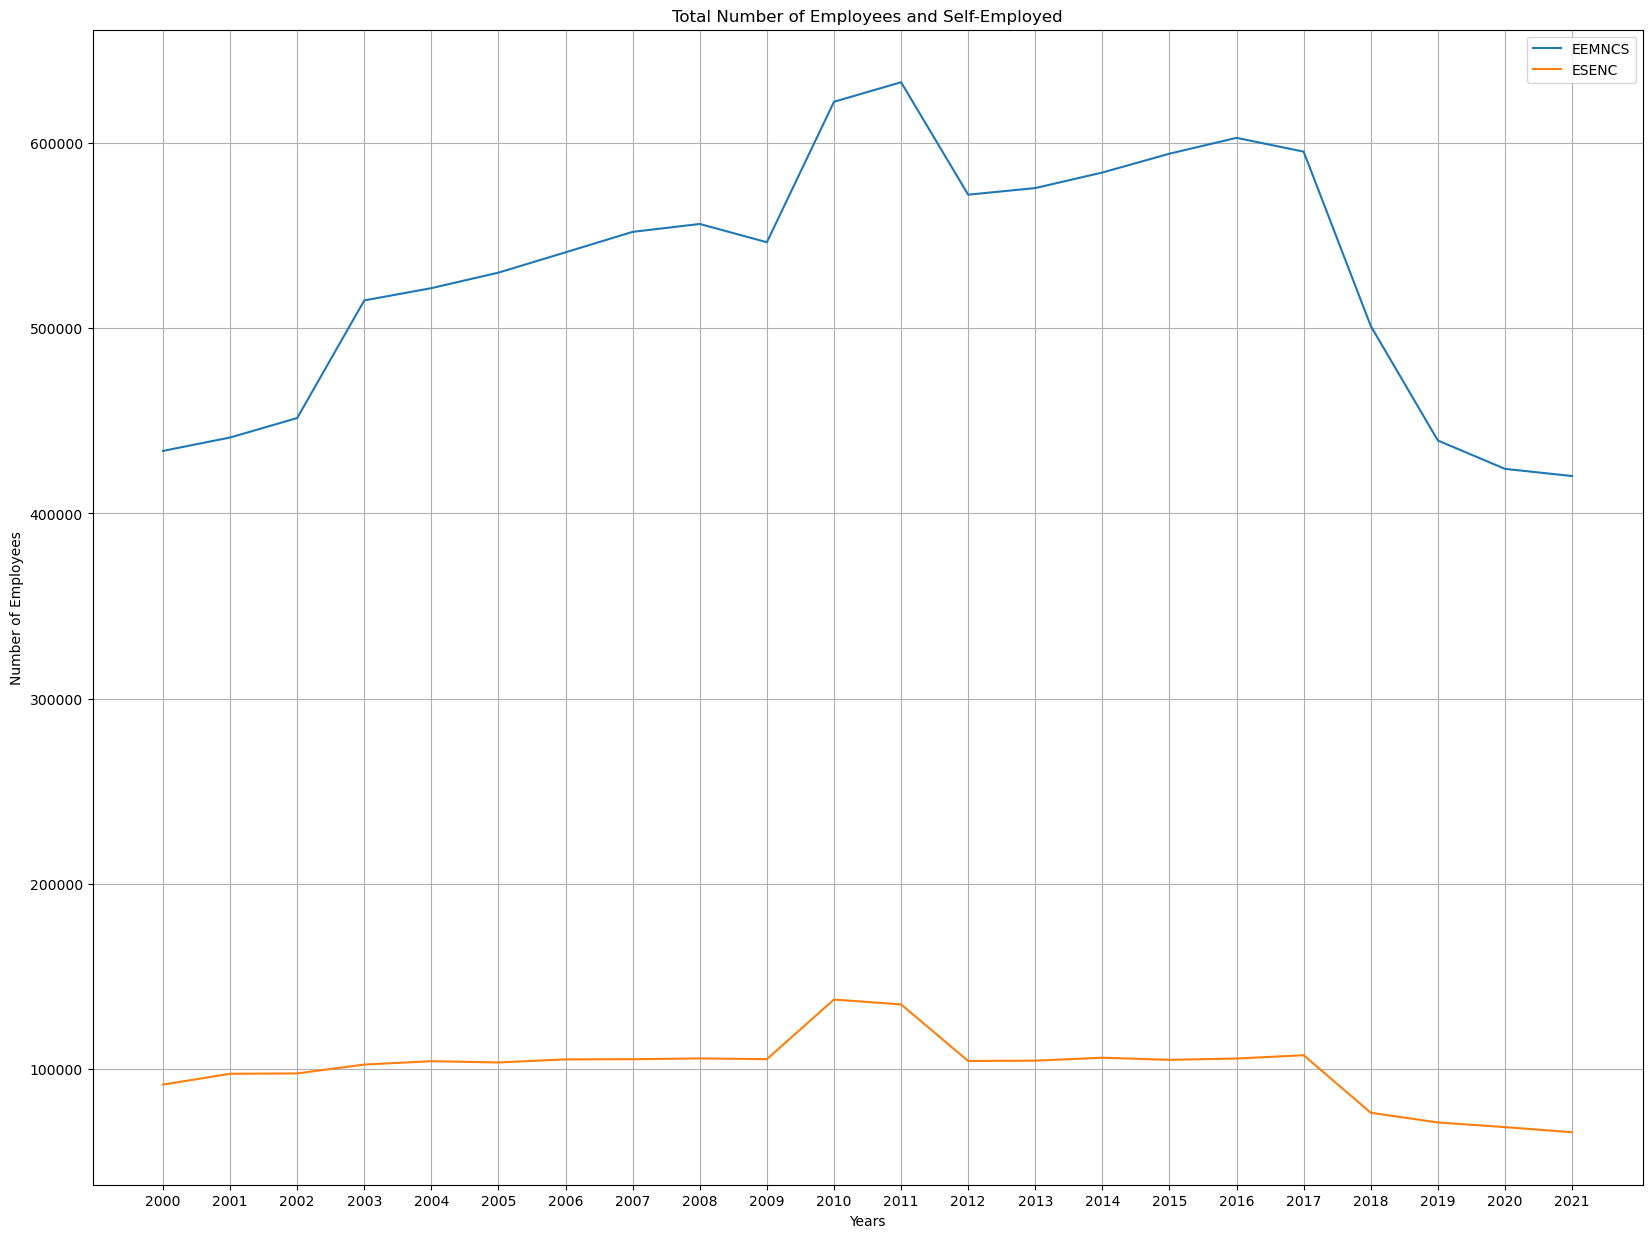

In [26]:
plt.figure(figsize=(20, 15))
df_sum = df_eemncs_sum[df_eemncs_sum['TIME'].isin(years)]
df_sum = df_eemncs_sum.set_index('TIME')
df_sum = df_eemncs_sum.drop(['TRANSACT'], axis=1)
plt.plot(years, df_sum['Value'], label="EEMNCS")

df_sum = df_esenc_sum[df_esenc_sum['TIME'].isin(years)]
df_sum = df_esenc_sum.set_index('TIME')
df_sum = df_esenc_sum.drop(['TRANSACT'], axis=1)
plt.plot(years, df_sum['Value'], label="ESENC")

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
plt.grid()
plt.xticks(years_xticks)
plt.xlabel("Years")
plt.ylabel("Number of Employees")
plt.title("Total Number of Employees and Self-Employed")
plt.show()

Clearly something is going on with 2017 because this graph makes it a lot more obvious that employment decreased in 2017, but overall this is a fairly boring graph